In [27]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import librosa.display


In [28]:
 
music_data = pd.read_csv('file.csv') 
music_data.head(5)

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [29]:
music_data['label'].value_counts()
dicti={0:'blues',1:'classical',2:'country',3:'disco',4:'hiphop',5:'jazz',6:'metal',7:'pop',8:'reggae',9:'rock'}

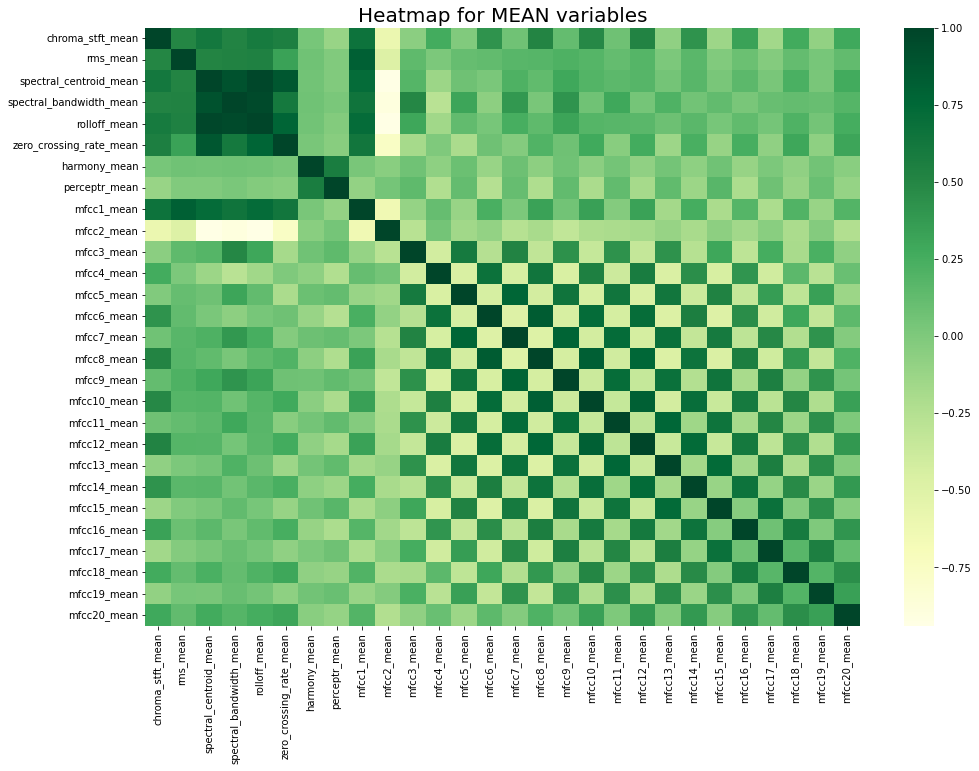

In [30]:
import numpy as np 
import seaborn as sns 

# Computing the Correlation Matrix 
spike_cols = [col for col in music_data.columns if 'mean' in col] 

# Set up the matplotlib figure 
f, ax = plt.subplots(figsize=(16, 11)); 

# Draw the heatmap with the mask and correct aspect ratio 
sns.heatmap(music_data[spike_cols].corr(), cmap='YlGn') 

plt.title('Heatmap for MEAN variables', fontsize = 20) 
plt.xticks(fontsize = 10) 
plt.yticks(fontsize = 10);


In [31]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
music_data['label'] = label_encoder.fit_transform(music_data['label'])
X = music_data.drop(['label','filename'],axis=1) 
y = music_data['label']


In [32]:
cols = X.columns 
minmax = preprocessing.MinMaxScaler() 
np_scaled = minmax.fit_transform(X) 

# new data frame with the new scaled data. 
X = pd.DataFrame(np_scaled, columns = cols)


In [33]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, 
													test_size=0.3, 
													random_state=111) 
X_train.shape, X_test.shape, y_train.shape, y_test.shape
X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [34]:
from sklearn.metrics import accuracy_score 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 


from xgboost import XGBClassifier 

rf = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0) 
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05) 

rf.fit(X_train, y_train) 
preds = rf.predict(X_test) 
print(rf.__class__.__name__,accuracy_score(y_test, preds))

xgb.fit(X_train, y_train) 
preds = xgb.predict(X_test) 
print(xgb.__class__.__name__,accuracy_score(y_test, preds))



RandomForestClassifier 0.78
XGBClassifier 0.7833333333333333


In [35]:
import librosa
import numpy as np

def extract_features(audio_file):
    # Load audio file
    y, sr = librosa.load(audio_file)
    
    # Extract features
    features = [
        librosa.get_duration(y=y, sr=sr),
        np.mean(librosa.feature.chroma_stft(y=y, sr=sr)),
        np.var(librosa.feature.chroma_stft(y=y, sr=sr)),
        np.mean(librosa.feature.rms(y=y)),
        np.var(librosa.feature.rms(y=y)),
        np.mean(librosa.feature.spectral_centroid(y=y, sr=sr)),
        np.var(librosa.feature.spectral_centroid(y=y, sr=sr)),
        np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr)),
        np.var(librosa.feature.spectral_bandwidth(y=y, sr=sr)),
        np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr)),
        np.var(librosa.feature.spectral_rolloff(y=y, sr=sr)),
        np.mean(librosa.feature.zero_crossing_rate(y)),
        np.var(librosa.feature.zero_crossing_rate(y)),
        np.mean(librosa.effects.harmonic(y)),
        np.var(librosa.effects.harmonic(y)),
        np.mean(librosa.effects.percussive(y)),
        np.var(librosa.effects.percussive(y)),
        librosa.beat.beat_track(y=y, sr=sr)[0]
    ]
    
    # MFCCs
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
    for i in range(1, 21):  # MFCCs 1 to 20
        features.extend([np.mean(mfcc[i-1]), np.var(mfcc[i-1])])

    return features

# Example usage
audio_file = 'hiphop.00000.wav'
audio_features = extract_features(audio_file)



In [36]:
r=np.array(audio_features)
r=r.reshape(1,-1)
pred=rf.predict(r)
print(dicti[pred[0]])




reggae
